In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
sym.init_printing(use_unicode=True)

In [2]:
L = ( lambda x: 0.5*x*(x-1), lambda x: -(x+1)*(x-1), lambda x: 0.5*x*(x+1) )

In [3]:
x = np.linspace(-1,1,100)
F = np.zeros((x.shape[0],3))

In [4]:
for i in range(3):
    F[:,i] = L[i](x)

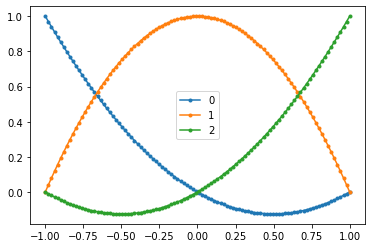

In [5]:
for i in range(3):
    plt.plot(x,F[:,i],'.-',label='{}'.format(i))
plt.legend()

In [48]:
X = np.array([-2,-1,0,1,2,3])
Y = np.array([4.,1.,-2.,4.,6.,3.])

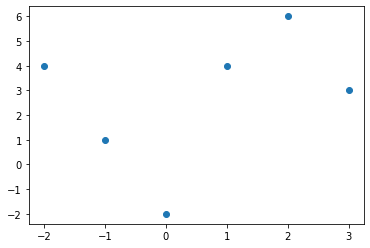

In [49]:
plt.scatter(X,Y)

In [50]:
def Lagrange(x,X,i):
    
    L = 1
    
    for j in range(X.shape[0]):
        if i != j:
            L *= (x - X[j])/(X[i]-X[j])
            
    return L

In [51]:
def Interpolate(x,X,Y):
    
    Poly = 0
    
    for i in range(X.shape[0]):
        Poly += Lagrange(x,X,i)*Y[i]
        
    return Poly

In [52]:
x = np.linspace(-2.,3.,100)
y = Interpolate(x,X,Y)

In [53]:
y1 = np.interp(x,X,Y)

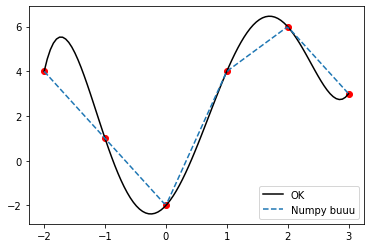

In [54]:
plt.plot(x,y,color='k',label='OK')
plt.plot(x,y1,'--',label='Numpy buuu')
plt.scatter(X,Y,color='r',marker='o')
plt.legend()

# Sympy

In [55]:
_x = sym.Symbol('x',real=True)

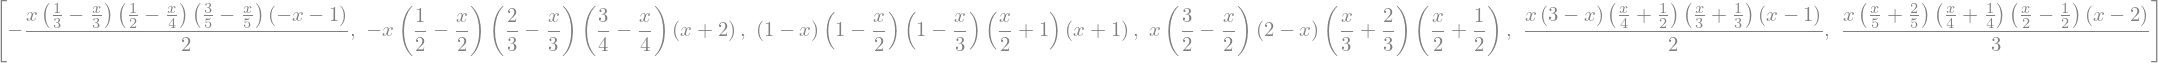

In [56]:
BasesCardinales = []
for i in range(X.shape[0]):
    BasesCardinales.append(Lagrange(_x,X,i))
BasesCardinales

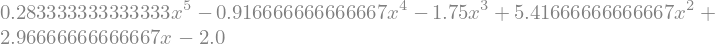

In [57]:
# Interpolamos sympy style
f = Interpolate(_x,X,Y)
f = sym.simplify(f)
f

In [58]:

df = sym.diff(f,_x,1)
d2f = sym.diff(f,_x,2)

In [59]:
# Convertimos los simbolos en funciones numpy
_f = sym.lambdify([_x],f,'numpy')
_df = sym.lambdify([_x],df,'numpy') 
_d2f = sym.lambdify([_x],d2f,'numpy') 

In [60]:
#Probamos
_df(3.1321)

In [61]:
# Invocamos el poder de Newton
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-8):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            # Criterio de parada
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
        
   # print('Raiz',xn,it)
    
    if it == itmax:
        return Flase
    else:
        return xn

In [62]:
GetNewtonMethod(_df,_d2f,3)

In [63]:
def GetAllRoots(x, tolerancia=11):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(_df,_d2f,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

In [64]:
xt = np.linspace(-2.,3,20)
Roots = GetAllRoots(xt)
Roots

array([-1.72434187, -0.24945067,  1.70261217,  2.85941566])

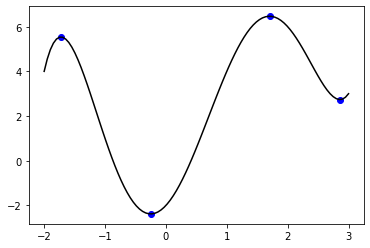

In [67]:
# Pintamos maximos y mínimos locales
plt.plot(x,y,color='k',label='OK')
plt.scatter(Roots,_f(Roots),color='b')